## Simple Logistic Regression Modeling
* Fit Logistic Regression Models
* Predict likelihoood of a customer closing their bank account as probabilitie of success and odd ratios
    * Quantify model performance using confusion matrices

#### The datasets you've seen so far all had a numeric response variable. 
#### Now we'll explore the case of a binary response variable.

### What is Logistic Regression
* Another type of generalized linear model
* Used when the response variable is `logical`
* The responses follow logistic (S-shaped) curve

### Exploring the Explanatory Variables
* When the response variable is `logical`, all the points lie on the `y=0 and y=1` lines making it difficult to see what is happening (**think binary/boolean result for our response variable**)

In [1]:
# import pandas and churn dataset
import pandas as pd

churn = pd.read_csv('../Datasets/churn.csv')
churn.head()

,has_churned,time_since_first_purchase,time_since_last_purchase
0,0,-1.089221,-0.721322
1,0,1.182983,3.634435
2,0,-0.846156,-0.427582
3,0,0.086942,-0.535672
4,0,-1.166642,-0.672640


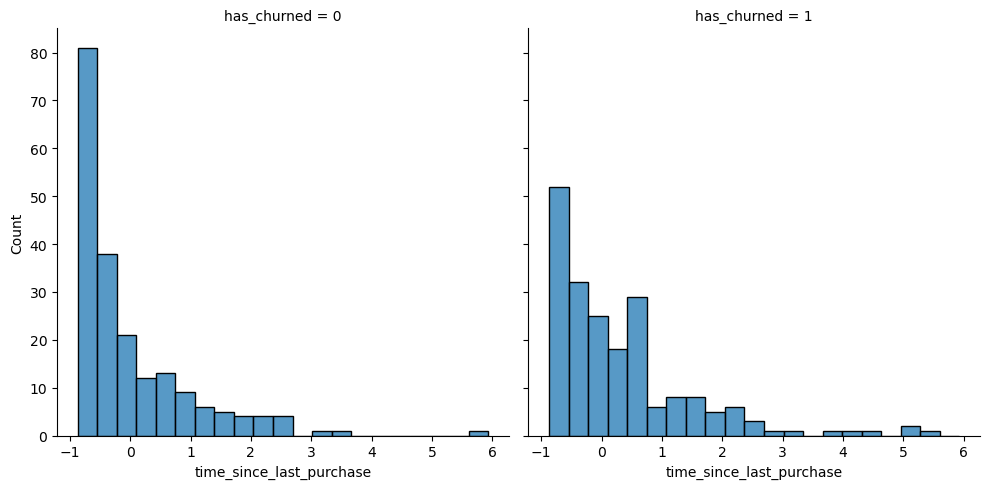

In [2]:
# Create the histograms of time_since_last_purchase split by has_churned
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(data=churn, x='time_since_last_purchase', col='has_churned')
plt.show()

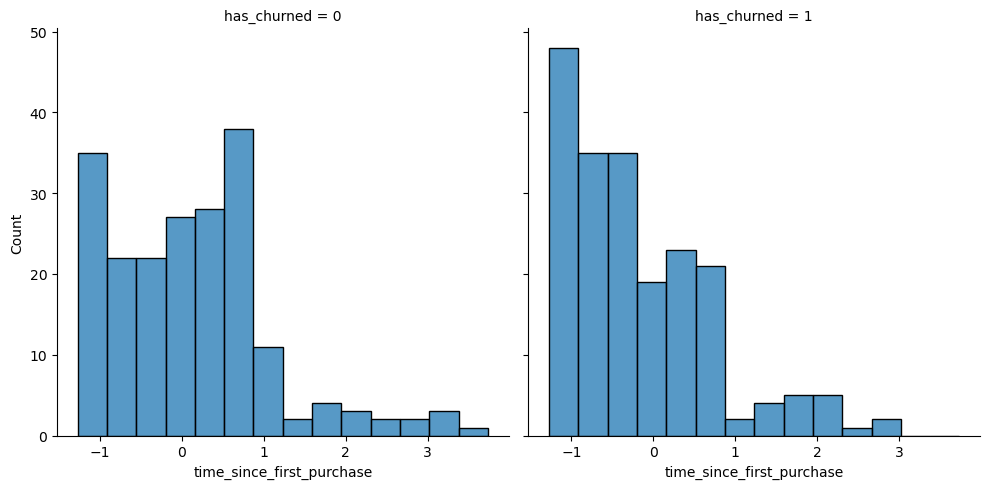

In [4]:
# Redraw the plot with time_since_first_purchase
sns.displot(data=churn, x='time_since_first_purchase', col='has_churned')
plt.show()

* In the `time_since_last_purchase` plot, the distribution of churned customers (**has_churned=1**) was further right than the distribution of non-churned customers (churners typically have longer times since their last purchase).
* For time_since_first_purchase the opposite is true: churners have a shorter length of relationship.

### Visualizing linear and logistic models
* As with **linear regressions**, `regplot()` will draw model predictions for a logistic regression without you having to worry about the modeling code yourself. 
* To see how the predictions differ for linear and logistic regressions, try drawing both trend lines side by side. 
    * Spoiler: you should see a `linear (straight line)` trend from the linear model, and a `logistic (S-shaped)` trend from the logistic model.

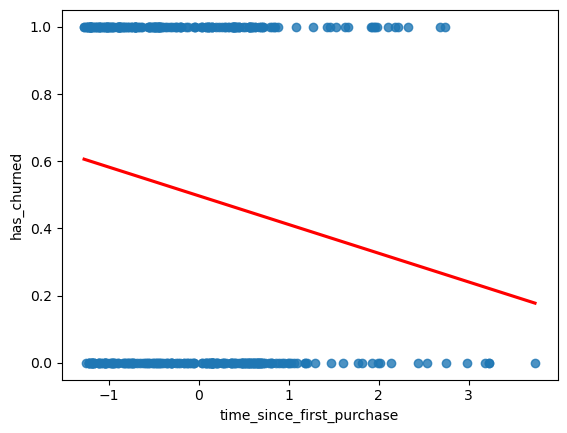

In [5]:
# Draw a linear regression trend line and a scatter plot of time_since_first_purchase vs. has_churned
sns.regplot(x='time_since_first_purchase', y='has_churned', data=churn, ci=None,
            line_kws={"color": "red"})

plt.show()

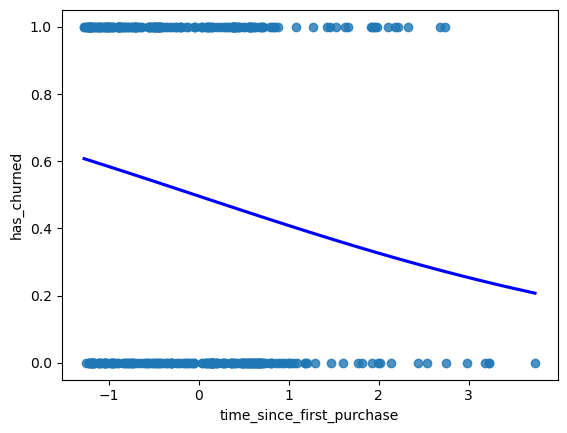

In [6]:
# Draw a logistic regression trend line and a scatter plot of time_since_first_purchase vs. has_churned
sns.regplot(x="time_since_first_purchase",
            y="has_churned",
            data=churn, 
            ci=None,
            line_kws={"color": "blue"},
            logistic=True)

plt.show()

### Logistic regression with logit()
* Logistic regression requires another function from our statsmodels api 
* Similar to our linear `ols`, `logit` is a function that takes the same structure as ols (see below)

In [7]:
# Import Logit
from statsmodels.formula.api import logit

mdl_churn_vs_relationship = logit('has_churned ~ time_since_first_purchase', data=churn).fit()

# Parameters of log model
mdl_churn_vs_relationship.params

Optimization terminated successfully.
         Current function value: 0.679663
         Iterations 4


Intercept                   -0.015185
time_since_first_purchase   -0.354795
dtype: float64

### Comparing scales
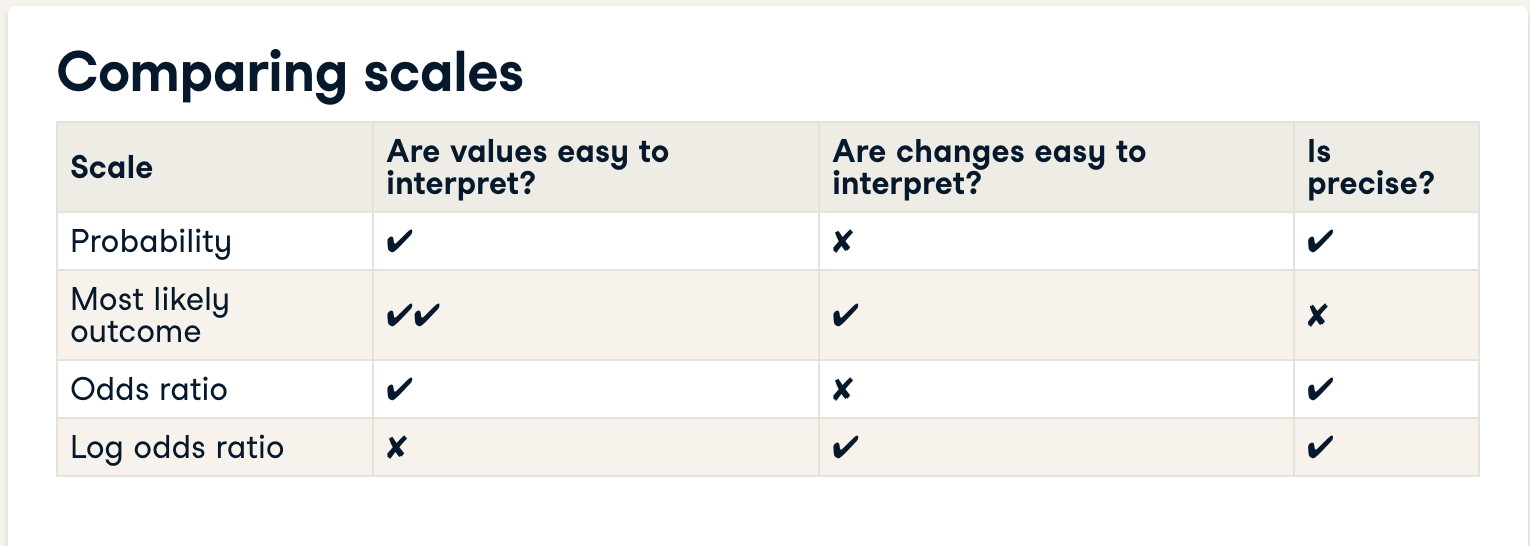
* Each way of describing responses has different benefits. 
    * `Most likely outcome` is easiest to understand because the answer is always yes or no, but this lacks precision. 
    * `Probabilities` and `odds ratios` are still fairly easy to understand for a data literate audience. However, the non-linear predictions make it hard to reason about how changes in the explanatory variable will change the response. 
    * `Log odds ratio` is difficult to interpret for individual values, but the linear relationship with the explanatory variables makes it easy to reason about changes.

### Probabilities

#### Predictions
* There are four ways of epxressing the prediction from a `log-reg` model
* First, since the response variable is either a "yes" or "no", you can make a prediction of the probability of a "yes"

In [11]:
# mdl_churn_vs_relationship is the fitted logistic regression model of 
# has_churned versus time_since_first_purchase. (see a few cells above)

#mdl_churn_vs_relationship = logit('has_churned ~ time_since_first_purchase', data=churn).fit()

import numpy as np
explanatory_data = pd.DataFrame({
    'time_since_first_purchase': np.arange(-1.5, 4.25, 0.25)
})
# Here is the dataframe we'll use for our model predictions
display(explanatory_data.head())

# Create a DataFrame, prediction_data, by assigning a column has_churned to explanatory_data.
prediction_data = explanatory_data.assign(
    has_churned = mdl_churn_vs_relationship.predict(explanatory_data)
)
prediction_data.head()

,time_since_first_purchase
0,-1.50
1,-1.25
2,-1.00
3,-0.75
4,-0.50


,time_since_first_purchase,has_churned
0,-1.50,0.626448
1,-1.25,0.605470
2,-1.00,0.584096
3,-0.75,0.562401
4,-0.50,0.540465


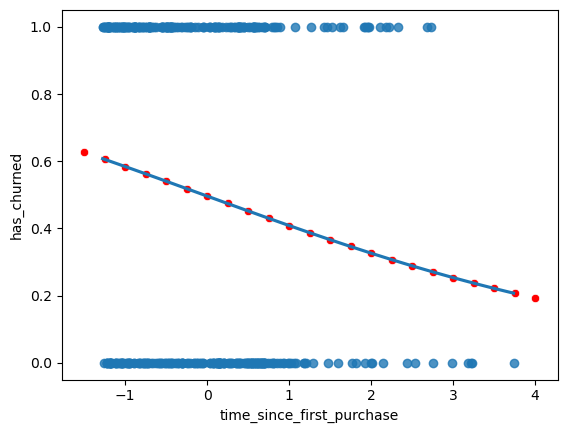

In [12]:
# Create a scatter plot with a logistic trend line of has_churned versus time_since_first_purchase.

fig = plt.figure()

sns.regplot(x='time_since_first_purchase',
           y='has_churned',
           data=churn,
           ci=None,
           logistic=True)

# Overlay w/prediction data, colred red
sns.scatterplot(x='time_since_first_purchase',
                y='has_churned',
                data=prediction_data, 
                color='red')
plt.show()

* As expected our prediction data data frame has the scatter plots for our fitted models follow the trendline of the created logistic regression plot

#### Most Likely Outcome
* When explaining your results, you may wish to side-step taling about probabilities and simply explain the `most likely outcome`
* That is rather than saying there is a 60% chance of a customer churning, you say that the most likely outcome is that the customer will churn.
* The trade-off here is easier interpretation at the cost of nuance

In [16]:
# Update prediction data dframe above by adding a most_likely_outcome column 

prediction_data['most_likely_outcome'] = np.round(prediction_data['has_churned'])

# Look at a few rows of new column
display(prediction_data.head())

# What's the breakdown for our prediction_dat for likely to churn or not
most_likely_churned = prediction_data.loc[prediction_data['most_likely_outcome'] == 1]
most_likely_not_churned = prediction_data.loc[prediction_data['most_likely_outcome'] != 1]

print("From our prediction_data, we see that {} customers have likely churned, while {} customers have likely not churned".format(
    len(most_likely_churned), most_likely_not_churned.shape[0]))

# Check w/value counts
prediction_data['most_likely_outcome'].value_counts()

,time_since_first_purchase,has_churned,most_likely_outcome
0,-1.50,0.626448,1.0
1,-1.25,0.605470,1.0
2,-1.00,0.584096,1.0
3,-0.75,0.562401,1.0
4,-0.50,0.540465,1.0


From our prediction_data, we see that 6 customers have likely churned, while 17 customers have likely not churned


0.0    17
1.0     6
Name: most_likely_outcome, dtype: int64

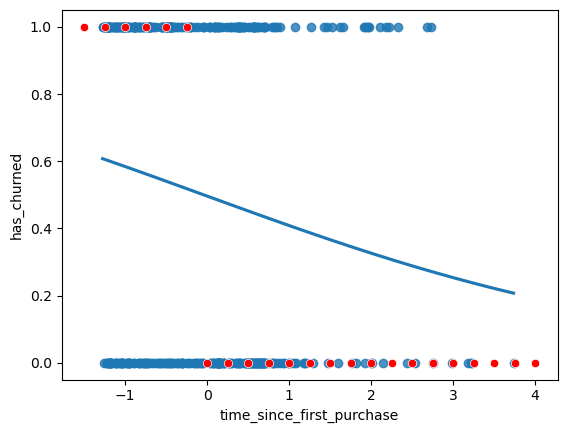

In [17]:
# Overlay the plot w/prediction_data with red data points, with most_likely_outcome on y-axis
fig = plt.figure()

# Create a scatter plot with logistic trend line (from previous exercise)
sns.regplot(x="time_since_first_purchase",
            y="has_churned",
            data=churn,
            ci=None,
            logistic=True)

# Overlay with prediction_data, colored red
sns.scatterplot(x="time_since_first_purchase",
                y="most_likely_outcome",
                data=prediction_data,
                color="red")

plt.show()

#### Odds ratio
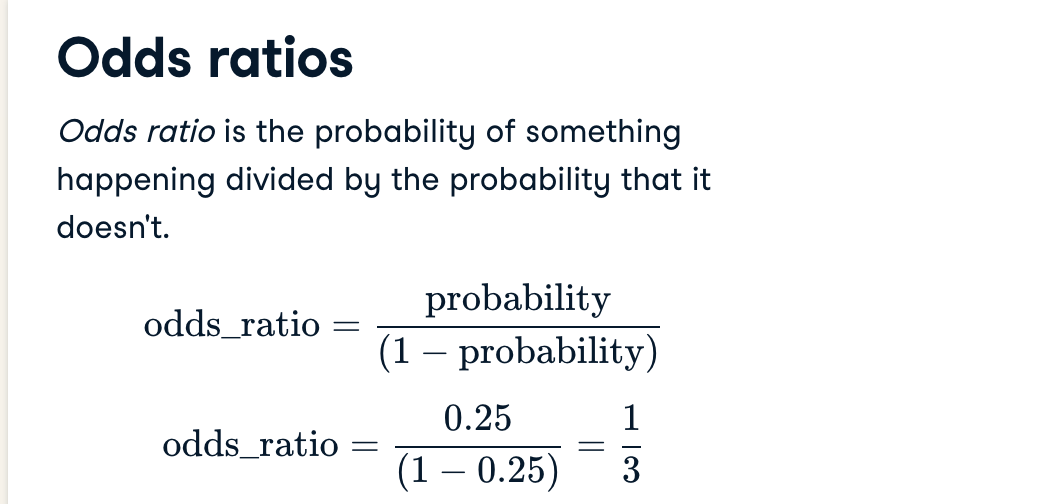
* For example, a probability of zero-point-two-five is the same as the odds of "three to one against", because the probability of the event not happening is zero-point-seven-five, which is three times as much. 

<br>

* Odds ratios compare the probability of something happening with the probability of it not happening. 
* This is sometimes easier to reason about than probabilities, particularly when you want to make decisions about choices.
* For example, if a customer has a 20% chance of churning, it may be more intuitive to say "the chance of them not churning is four times higher than the chance of them churning)

In [23]:
# update prediction data with odds_ratio (probability / (1 - probability))
prediction_data['odds_ratio'] = prediction_data['has_churned'] / (1 - prediction_data['has_churned'])
prediction_data.drop(columns='odss_ratio', inplace=True)
prediction_data.head()

,time_since_first_purchase,has_churned,most_likely_outcome,odds_ratio
0,-1.50,0.626448,1.0,1.677003
1,-1.25,0.605470,1.0,1.534661
2,-1.00,0.584096,1.0,1.404400
3,-0.75,0.562401,1.0,1.285197
4,-0.50,0.540465,1.0,1.176111


<Figure size 640x480 with 0 Axes>

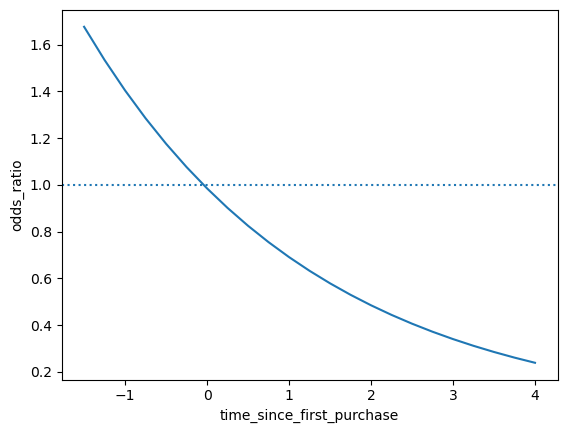

In [21]:
fig = plt.figure()

# Create a line plot of odds_ratio vs time_since_first_purchase
sns.lineplot(x='time_since_first_purchase', y='odds_ratio', data=prediction_data)

# Add a dotted horizontal line at odds_ratio = 1
plt.axhline(y=1, linestyle="dotted")

plt.show()

* Here, the **dotted line** where the odds ratio is one indicates where churning is just as likely as not churning. 
* So in the above we can see the relationship based on the even odds at 1 for each probability and how the odds change with our explanatory variables for our odds_ratio for a churn

#### Log odds ratio
* One downside to `probabilities` and `odds ratios` for logistic regression predictions is that the prediction lines for each are curved. 
* This makes it harder to reason about what happens to the prediction when you make a change to the explanatory variable. 
* The logarithm of the odds ratio (the "log odds ratio" or "logit") does have a linear relationship between predicted response and explanatory variable. 
    * That means that as the explanatory variable changes, you don't see dramatic changes in the response metric - only linear changes.

* Since the actual values of log odds ratio are less intuitive than (linear) odds ratio, for visualization purposes it's usually better to plot the odds ratio and apply a log transformation to the y-axis scale.

,time_since_first_purchase,has_churned,most_likely_outcome,odds_ratio,log_odds_ratio
0,-1.50,0.626448,1.0,1.677003,0.517008
1,-1.25,0.605470,1.0,1.534661,0.428309
2,-1.00,0.584096,1.0,1.404400,0.339610
3,-0.75,0.562401,1.0,1.285197,0.250912
4,-0.50,0.540465,1.0,1.176111,0.162213


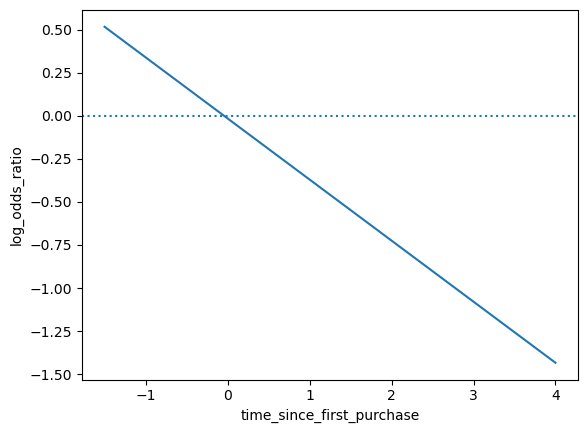

In [25]:
# Update prediction data with log_odds_ratio
prediction_data['log_odds_ratio'] = np.log(prediction_data['odds_ratio'])

# Print the head
display(prediction_data.head())

fig = plt.figure()

# Update the line plot: log_odds_ratio vs. time_since_first_purchase
sns.lineplot(x="time_since_first_purchase",
             y="log_odds_ratio",
             data=prediction_data)

# Add a dotted horizontal line at log_odds_ratio = 0
plt.axhline(y=0, linestyle="dotted")

plt.show()

### Quantifying logistic regression fit

* A logical response variable leads to four possible outcomes. 
    * If the customer didn't churn and we predicted they wouldn't, or if they did churn and we predicted that, the model did well. 
    * There are two bad cases. Predicting the customer churned when they didn't is called a `false positive`.
    * Predicting the customer didn't churn when they did is called a `false negative`. 
    
* The counts of each outcome are called a confusion matrix.

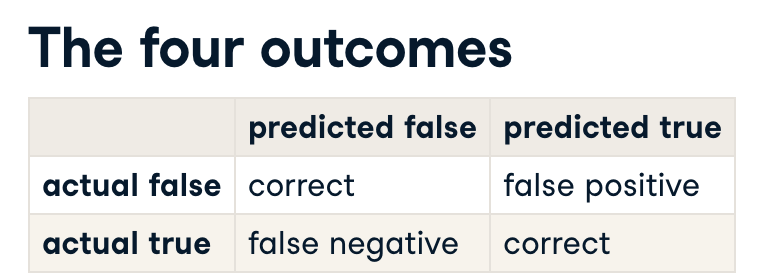

#### Calculating the confusion matrix
* A `confusion matrix` (occasionally called a confusion table) is the basis of all performance metrics for models with a categorical response (such as a logistic regression). 
* It contains the counts of each actual response-predicted response pair. 
    * In this case, where there are two possible responses (churn or not churn), there are four overall outcomes.

1. `True positive`: The customer churned and the model predicted they would.
2. `False positive`: The customer didn't churn, but the model predicted they would.
3. `True negative`: The customer didn't churn and the model predicted they wouldn't.
4. `False negative`: The customer churned, but the model predicted they wouldn't.

In [26]:
# Get the actual responses
actual_response = churn['has_churned']

# Get the predicted responses
predicted_response = np.round(mdl_churn_vs_relationship.predict())

# Create outcomes as a DataFrame of both Series
outcomes = pd.DataFrame({'actual_response':actual_response,
                         'predicted_response':predicted_response})

# Print the outcomes
print(outcomes.value_counts(sort = False))

actual_response  predicted_response
0                0.0                   112
                 1.0                    88
1                0.0                    76
                 1.0                   124
dtype: int64


#### Drawing a mosaic plot of the confusion matrix
While calculating the performance matrix might be fun, it would become tedious if you needed multiple confusion matrices of different models. Luckily, the .pred_table() method can calculate the confusion matrix for you.

Additionally, you can use the output from the .pred_table() method to visualize the confusion matrix, using the mosaic() function.

[[112.  88.]
 [ 76. 124.]]


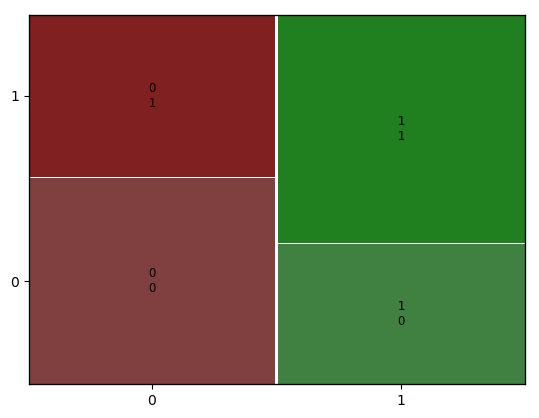

In [27]:
# Import mosaic from statsmodels.graphics.mosaicplot
from statsmodels.graphics.mosaicplot import mosaic

# Calculate the confusion matrix conf_matrix
conf_matrix = mdl_churn_vs_relationship.pred_table()

# Print it
print(conf_matrix)

# Draw a mosaic plot of conf_matrix
mosaic(conf_matrix)
plt.show()

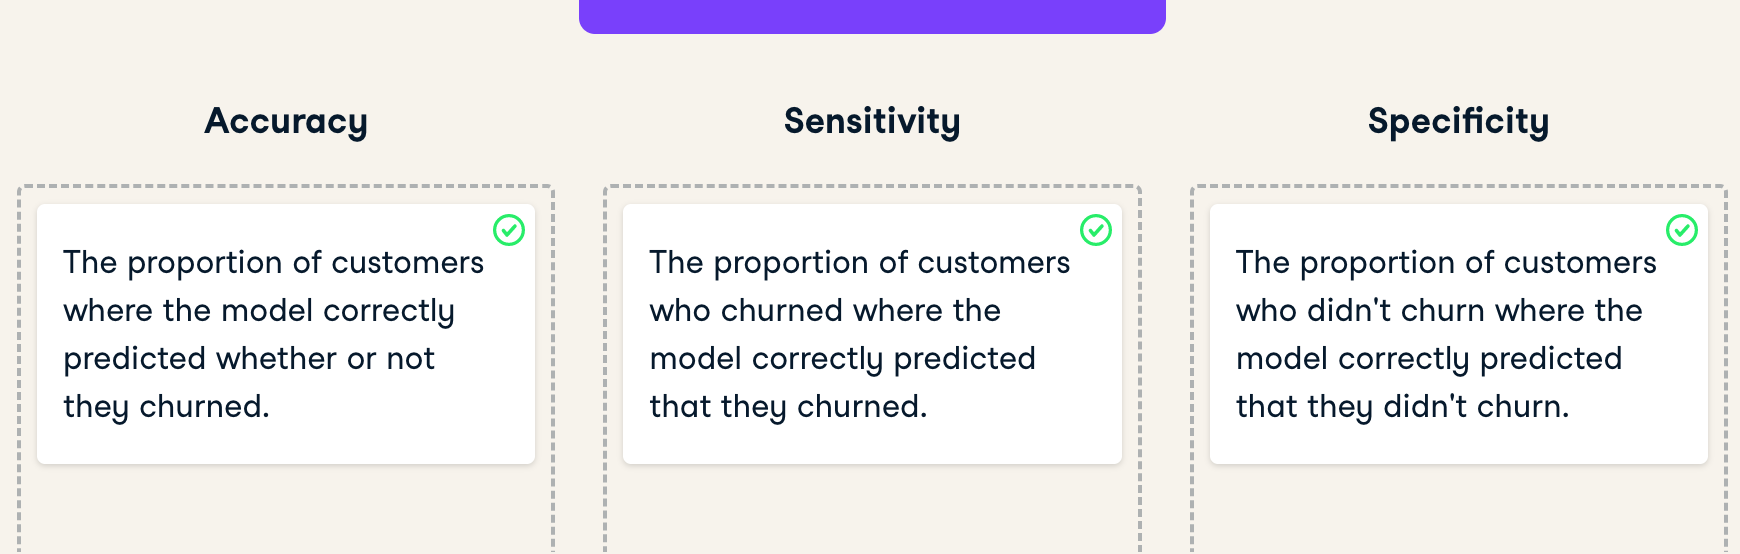

#### Measuring Logisitc Model Performance
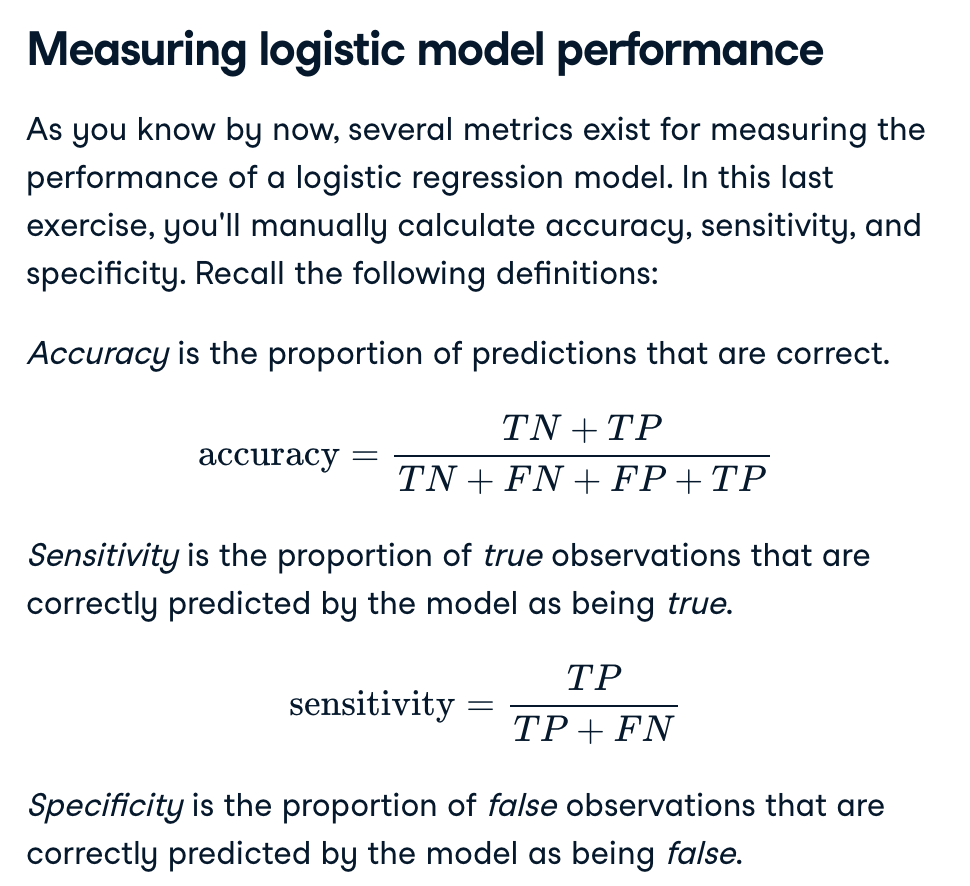

In [28]:
# Extract TN, TP, FN and FP from conf_matrix
TN = conf_matrix[0,0]
TP = conf_matrix[1,1]
FN = conf_matrix[1,0]
FP = conf_matrix[0,1]

# Calculate and print the accuracy
accuracy = (TN + TP) / (TN + TP + FN + FP)
print("accuracy: ", accuracy)

# Calculate and print the sensitivity
sensitivity = TP / (FN + TP)
print("sensitivity: ", sensitivity)

# Calculate and print the specificity
specificity = TN / (TN + FP)
print("specificity: ", specificity)

accuracy:  0.59
sensitivity:  0.62
specificity:  0.56
